In [9]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [30]:
# Assemble the index tickers for global indexes S&P, NASDAQ, Shanghai, Germany, UK & Japam
tickers = ['^GSPC','^IXIC', '^GDAXI','^FTSE']

In [31]:
index_data = pd.DataFrame()

for t in tickers:
    index_data[t] = wb.DataReader(t, data_source='yahoo', start='2017-1-1')['Adj Close']

In [32]:
index_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2017-01-03,2257.830078,5429.080078,11584.240234,7177.899902
2017-01-04,2270.750000,5477.000000,11584.309570,7189.700195
2017-01-05,2269.000000,5487.939941,11584.940430,7195.299805
2017-01-06,2276.979980,5521.060059,11599.009766,7210.100098
2017-01-09,2268.899902,5531.819824,11563.990234,7237.799805


In [33]:
index_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2017-10-17,2559.360107,6623.660156,12995.059570,7516.200195
2017-10-18,2561.260010,6624.220215,13043.030273,7542.899902
2017-10-19,2562.100098,6605.069824,12990.099609,7523.000000
2017-10-20,2575.209961,6629.049805,12991.280273,7523.200195
2017-10-23,2564.979980,6586.830078,13003.139648,7524.500000


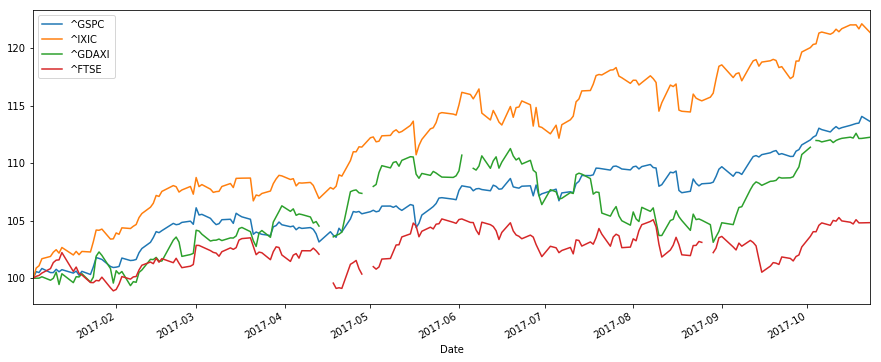

In [35]:
# Normalize the data to 100 to study YTD index return patterns
(index_data / index_data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

In [36]:
# Calculate the simple daily returns of indices
index_returns = (index_data/index_data.shift(1)) - 1
index_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2017-10-17,0.000673,-0.000051,-0.000664,-0.001435
2017-10-18,0.000742,0.000085,0.003691,0.003552
2017-10-19,0.000328,-0.002891,-0.004058,-0.002638
2017-10-20,0.005117,0.003631,0.000091,0.000027
2017-10-23,-0.003972,-0.006369,0.000913,0.000173


In [37]:
# Annualize the daily returns of an index
annual_index_returns = index_returns.mean() * 250
annual_index_returns

^GSPC     0.159411
^IXIC     0.242738
^GDAXI    0.164696
^FTSE     0.097745
dtype: float64

In [43]:
# compare an asset to index returns
tickers2 = ['MNKD', '^GSPC', '^DJI']
index_comp = pd.DataFrame()

# insert tickers into DataFrame

for t in tickers2:
    index_comp[t] = wb.DataReader(t,data_source='yahoo',start='2017-1-1')['Adj Close']

In [44]:
index_comp.tail()

,MNKD,^GSPC,^DJI
Date,,,
2017-10-17,4.75,2559.360107,22997.439453
2017-10-18,4.13,2561.260010,23157.599609
2017-10-19,3.96,2562.100098,23163.039063
2017-10-20,4.11,2575.209961,23328.630859
2017-10-23,3.70,2564.979980,23273.960938


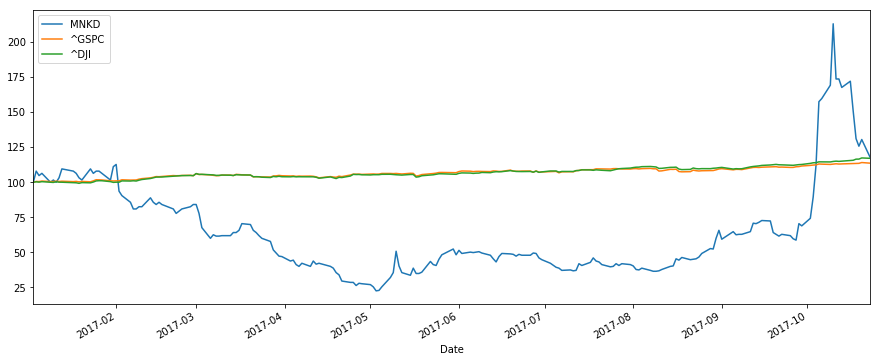

In [45]:
# normalize the returns to 100
(index_comp / index_comp.iloc[0]*100).plot(figsize=(15,6))
plt.show()